<a href="https://colab.research.google.com/github/chaikrk/Linear_Regression_Riyadh_Houses/blob/main/Linear_reggresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("halaturkialotaibi/riyadh-real-estate-apartments-for-sale")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/riyadh-real-estate-apartments-for-sale


In [ ]:
import pandas as pd
import os

# Load the CSV files into pandas DataFrames
df_main = pd.read_csv(os.path.join(path, 'riyadh_apartments_data.csv'))
df_geo = pd.read_csv(os.path.join(path, 'riyadh_geocoding.csv'))

# Display the first few rows of each DataFrame to verify
print("df_main head:")
print(df_main.head())
print("\ndf_geo head:")
print(df_geo.head())

df_main head:
     City Region                          Neighborhood Property Type  \
0  Riyadh   West                                Shubra     apartment   
1  Riyadh   West                             Al-Oraija     apartment   
2  Riyadh   East                              Al-Sulay     apartment   
3  Riyadh  North                            Al-Yasmeen     apartment   
4  Riyadh   West  Al-Oraija Al-Gharbi (Western Oraija)     apartment   

   Area (sqm)  Bedrooms  Bathrooms  Floor Number Elevator  \
0         138         4          4             4      Yes   
1         274         4          2             2      Yes   
2         185         1          2             3       No   
3         272         4          2             3       No   
4         244         2          3             5      Yes   

   Property Age (years) Furnished Listing Type  Selling Price (SAR)  
0                     8       Yes         Sale            459219.35  
1                     8       Yes         Sale

In [ ]:
df_main .head()


,City,Region,Neighborhood,Property Type,Area (sqm),Bedrooms,Bathrooms,Floor Number,Elevator,Property Age (years),Furnished,Listing Type,Selling Price (SAR)
0,Riyadh,West,Shubra,apartment,138,4,4,4,Yes,8,Yes,Sale,459219.35
1,Riyadh,West,Al-Oraija,apartment,274,4,2,2,Yes,8,Yes,Sale,810905.38
2,Riyadh,East,Al-Sulay,apartment,185,1,2,3,No,9,Yes,Sale,797967.69
3,Riyadh,North,Al-Yasmeen,apartment,272,4,2,3,No,6,No,Sale,2245339.91
4,Riyadh,West,Al-Oraija Al-Gharbi (Western Oraija),apartment,244,2,3,5,Yes,2,No,Sale,827890.53


In [ ]:
df_geo.head()


,City,Region,Neighborhood,latitude,longitude
0,Riyadh,Central,Al-Malaz,24.664682,46.755977
1,Riyadh,Central,Al-Yamamah,24.596208,46.752777
2,Riyadh,Central,Al-Morouj,24.757329,46.682641
3,Riyadh,Central,Al-Batha,24.621882,46.722703
4,Riyadh,Central,Al-Wurud,24.621882,46.722703


In [ ]:
df_main = df_main.drop(columns = ['City'])
df_main.head()

,Region,Neighborhood,Property Type,Area (sqm),Bedrooms,Bathrooms,Floor Number,Elevator,Property Age (years),Furnished,Listing Type,Selling Price (SAR)
0,West,Shubra,apartment,138,4,4,4,Yes,8,Yes,Sale,459219.35
1,West,Al-Oraija,apartment,274,4,2,2,Yes,8,Yes,Sale,810905.38
2,East,Al-Sulay,apartment,185,1,2,3,No,9,Yes,Sale,797967.69
3,North,Al-Yasmeen,apartment,272,4,2,3,No,6,No,Sale,2245339.91
4,West,Al-Oraija Al-Gharbi (Western Oraija),apartment,244,2,3,5,Yes,2,No,Sale,827890.53


In [ ]:
df_merged = pd.merge(df_main, df_geo, on='Neighborhood', how='left')
df_merged.head()


,Region_x,Neighborhood,Property Type,Area (sqm),Bedrooms,Bathrooms,Floor Number,Elevator,Property Age (years),Furnished,Listing Type,Selling Price (SAR),City,Region_y,latitude,longitude
0,West,Shubra,apartment,138,4,4,4,Yes,8,Yes,Sale,459219.35,Riyadh,West,24.578871,46.688656
1,West,Al-Oraija,apartment,274,4,2,2,Yes,8,Yes,Sale,810905.38,Riyadh,West,24.624458,46.730216
2,East,Al-Sulay,apartment,185,1,2,3,No,9,Yes,Sale,797967.69,Riyadh,East,24.654109,46.897656
3,North,Al-Yasmeen,apartment,272,4,2,3,No,6,No,Sale,2245339.91,Riyadh,North,24.821918,46.683226
4,West,Al-Oraija Al-Gharbi (Western Oraija),apartment,244,2,3,5,Yes,2,No,Sale,827890.53,Riyadh,West,24.595890,46.673515


In [ ]:
df_merged[['Neighborhood', 'latitude', 'longitude']].isnull().sum()


,0
Neighborhood,0
latitude,0
longitude,0


In [ ]:
# Keep only rows where the property is listed for sale
df = df_merged[df_merged["Listing Type"].str.lower() == "sale"].copy()


In [ ]:
print(df["Listing Type"].value_counts())


Listing Type
Sale    10000
Name: count, dtype: int64


In [ ]:
df = df.drop(columns=["Listing Type"])


In [ ]:
# 2. Drop unnecessary columns
df = df.drop(columns=["City", "Region_y"])

In [ ]:
# 3. Convert Yes/No → 1/0
df["Elevator"] = df["Elevator"].map({"Yes": 1, "No": 0})
df["Furnished"] = df["Furnished"].map({"Yes": 1, "No": 0})

In [ ]:
df = pd.get_dummies(df, columns=["Property Type", "Region_x"], drop_first=True)


In [ ]:
df.head()


,Neighborhood,Area (sqm),Bedrooms,Bathrooms,Floor Number,Elevator,Property Age (years),Furnished,Selling Price (SAR),latitude,longitude,Region_x_East,Region_x_North,Region_x_South,Region_x_West
0,Shubra,138,4,4,4,1,8,1,459219.35,24.578871,46.688656,False,False,False,True
1,Al-Oraija,274,4,2,2,1,8,1,810905.38,24.624458,46.730216,False,False,False,True
2,Al-Sulay,185,1,2,3,0,9,1,797967.69,24.654109,46.897656,True,False,False,False
3,Al-Yasmeen,272,4,2,3,0,6,0,2245339.91,24.821918,46.683226,False,True,False,False
4,Al-Oraija Al-Gharbi (Western Oraija),244,2,3,5,1,2,0,827890.53,24.595890,46.673515,False,False,False,True


In [ ]:
neighborhood_col = df["Neighborhood"]  # keep for visuals
df = df.drop(columns=["Neighborhood"])  # drop from model input


In [ ]:
df.head()


,Area (sqm),Bedrooms,Bathrooms,Floor Number,Elevator,Property Age (years),Furnished,Selling Price (SAR),latitude,longitude,Region_x_East,Region_x_North,Region_x_South,Region_x_West
0,138,4,4,4,1,8,1,459219.35,24.578871,46.688656,False,False,False,True
1,274,4,2,2,1,8,1,810905.38,24.624458,46.730216,False,False,False,True
2,185,1,2,3,0,9,1,797967.69,24.654109,46.897656,True,False,False,False
3,272,4,2,3,0,6,0,2245339.91,24.821918,46.683226,False,True,False,False
4,244,2,3,5,1,2,0,827890.53,24.595890,46.673515,False,False,False,True


In [ ]:
import numpy as np

# Log-transform the target
y_log = np.log1p(df["Selling Price (SAR)"])  # log(1 + x)

y = y_log
x = df.drop(columns=['Selling Price (SAR)'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f} SAR")
print(f"R² Score: {r2:.3f}")


RMSE: 0.19 SAR
R² Score: 0.949


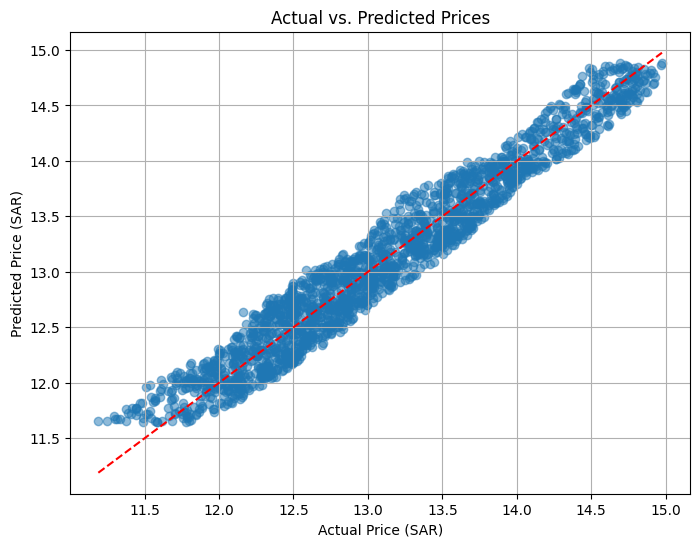

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (SAR)")
plt.ylabel("Predicted Price (SAR)")
plt.title("Actual vs. Predicted Prices")
plt.grid(True)
plt.show()
